In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target'] = dataset.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
X.shape

(150, 4)

In [14]:
y.shape

(150,)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
classifier = DecisionTreeClassifier()

In [18]:
parameters = {
    'criterion':('gini','entropy','log_loss'),
    'splitter':('best','random'),
    'max_depth':[2,3,4,5,6]
}

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
clf = GridSearchCV(classifier,param_grid = parameters,cv=5)

In [21]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [2, 3, 4, 5, 6],
                         'splitter': ('best', 'random')})

In [22]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

In [23]:
clf.best_score_

0.93

In [24]:
classifier = DecisionTreeClassifier(criterion='gini',max_depth=3,splitter='best')

In [25]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [28]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [29]:
print(accuracy_score(y_test,y_pred))

0.98


In [30]:
print(confusion_matrix(y_test,y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



[Text(0.375, 0.875, 'X[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.25, 0.375, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.125, 0.125, 'gini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

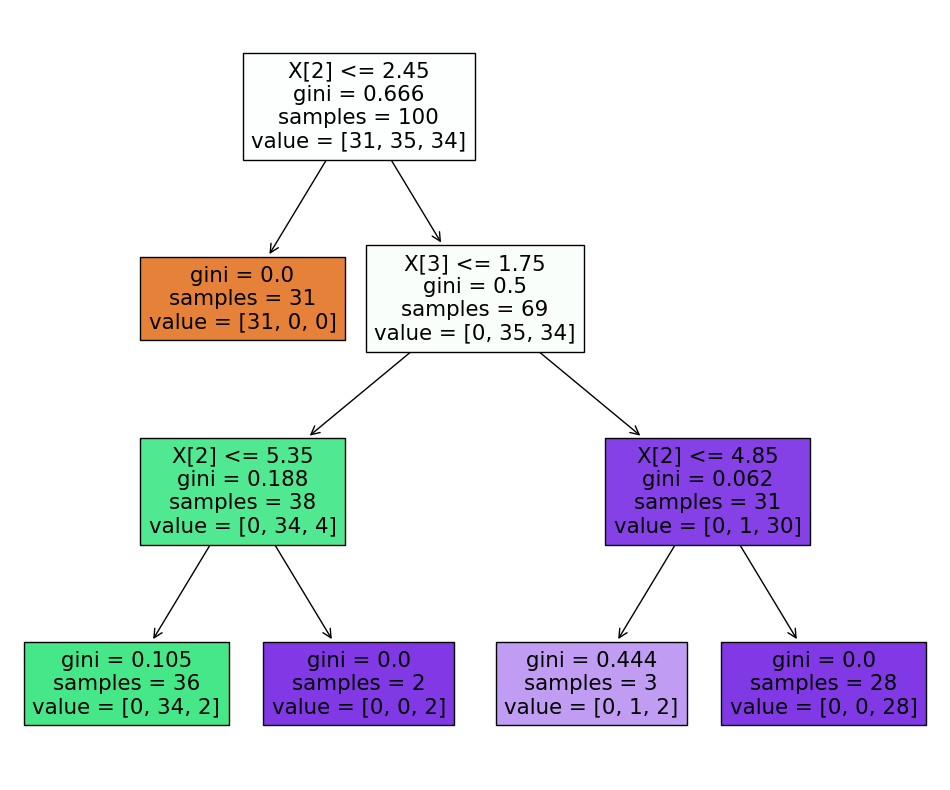

In [32]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)